In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import naludaq
print(f"Naludaq version: {naludaq.__version__}")

Naludaq version: 0.31.7


In [9]:
from naludaq.backend import DiskAcquisition

ACQ_PATH = "data/SineWave_100MHz/"
channels = 4
# DiskAcquisition is recommended to be used as a context manager for safety
with DiskAcquisition(ACQ_PATH) as acq:
    print("Board model:", acq.params["model"])
    print("Number of events:", len(acq))
    print("Pedestals stored:", acq.pedestals is not None)

acq= DiskAcquisition(ACQ_PATH)

from naludaq.tools.pedestals.pedestals_correcter import PedestalsCorrecter
pedestals=acq.pedestals
params = acq.params
corrector = PedestalsCorrecter(params, pedestals)

Board model: dsa-c10-8
Number of events: 1013
Pedestals stored: True


Event number: 219


Text(0, 0.5, 'ADC Count')

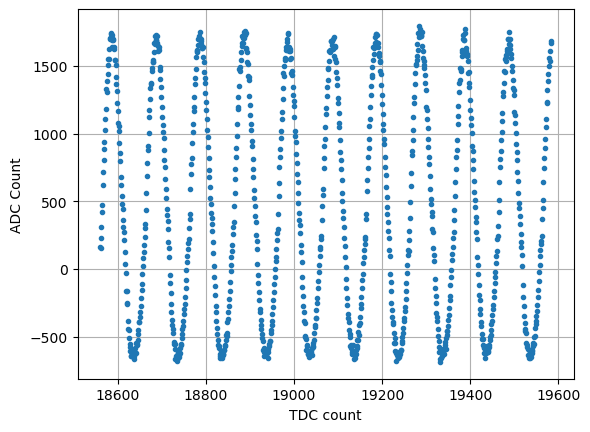

In [10]:
# event_num=np.random.randint(0, 1012)
event_num = 219
print("Event number: {}".format(event_num))
event=acq[event_num]
corrected_event = corrector.run(event, correct_in_place=True)
time=corrected_event["time"]
adc=corrected_event["data"]
plt.plot(time[4],adc[4],'.',label="Ch. 4")
plt.grid()
plt.xlabel("TDC count")
plt.ylabel("ADC Count")

In [34]:
print(len(adc[4][(adc[4]>1500)]))
print(len(adc[4][(adc[4]<-425)]))
print(adc[4].max())
print(adc[4].min())


175
243
1785.6
-698.0


In [11]:
time_adjusted = time[4] - time[4][0]
time_adjusted = time_adjusted * 0.1
'''
ped_corr = [10.85013972, 10.58666667, 10.65772455, 10.72546906, 10.61720559, 10.73189621,
 10.36522954, 10.46954092, 11.23285429, 10.6497006 , 10.49736527, 11.40606786,
 10.57864271, 10.40786427, 10.04610778, 11.15061876, 10.85325349, 11.09764471,
 10.43161677, 10.5500998 , 10.13305389, 11.23265469, 10.61017964, 10.12682635,
 11.13201597, 11.55684631, 10.09373253, 10.92151697, 11.06590818, 10.27976048,
 11.57213573, 10.39740519, 10.95389222, 10.9994012 , 10.6647505 , 10.59097804,
 10.68083832, 10.61001996, 10.99600798, 10.79972056, 10.50850299, 11.46650699,
 11.32670659,  9.76027944, 10.43824351, 11.28251497, 10.95916168, 10.68862275,
 10.30810379, 10.65481038, 10.83904192, 10.37437126, 10.59932136, 10.61177645,
 10.40427146, 10.92678643, 10.62550898, 10.29944112, 10.50227545, 10.19201597,
 10.67053892, 10.34051896, 10.68015968, 10.17888224, 10.51157685, 10.22087824,
 10.95840319, 10.19876248, 10.23417166, 10.44151697, 11.66622754, 10.06846307,
 10.65812375, 10.44287425, 10.48295409, 10.43093812, 10.87033932, 11.05249501,
 11.1451497 , 10.78391218, 10.8011976 , 11.13656687, 10.68814371, 11.01229541,
 10.79568862, 11.21572854, 10.93233533, 11.26159681, 10.97952096, 10.72007984,
 10.72      , 10.59756487, 11.03616766, 10.86179641, 10.41205589, 11.50095808,
 10.60874251, 10.53644711, 10.07916168, 10.5746507 , 10.82858283, 10.32331337,
 10.85377246, 11.33952096, 11.04858283, 11.09361277, 11.68982036, 10.11876248,
 10.98634731, 10.5059481 , 11.35724551, 10.73393214, 10.49928144, 11.42590818,
 11.24343313, 11.52075848, 10.80706587, 10.72590818, 11.2047505 , 11.08654691,
 11.32678643, 10.58822355, 10.70391218, 11.15181637, 11.13768463, 11.38622754,
 12.06630739, 13.20542914]
cell_offset = [353.6,  347.2,  345.65, 334.85, 341.35, 337.35, 336.,   342.05, 341.8,  354.65,
 352.95, 357.3 , 364.  , 364.75, 371.15, 358.8 , 358.3 , 348.15, 343.65, 342.35,
 338.35, 335.5 , 334.5 , 344.9 , 341.35, 353.5 , 346.75, 341.45, 340.55, 339.4,
 325.7 , 329.85, 325.95, 321.8 , 325.55, 317.65, 324.85, 333.65, 335.95, 347.2,
 353.85, 358.4 , 350.75, 351.7 , 343.7 , 338.65, 334.4 , 335.1 , 331.4 , 335.6,
 330.  , 336.4 , 345.8 , 351.85, 346.2 , 350.1 , 354.7 , 344.  , 333.85, 332.7,
 322.5 , 318.95, 325.3 , 329.85, 326.05, 320.75, 326.4 , 347.25, 344.45, 354.25,
 349.85, 342.15, 349.05, 343.9 , 343.1 , 341.95, 347.85, 340.35, 341.15, 353.65,
 358.95, 365.55, 366.55, 367.85, 356.25, 364.65, 358.  , 353.  , 341.6 , 336.45,
 332.85, 329.55, 331.3 , 334.7 , 339.1 , 349.7 , 349.95, 358.  , 349.15, 350.1,
 347.7 , 338.85, 334.35, 335.3 , 342.3 , 330.8 , 334.2 , 342.4 , 347.85, 349.8,
 360.45, 369.05, 362.95, 369.2 , 361.4 , 359.5 , 350.7 , 341.7 , 334.75, 339.15,
 334.5 , 338.45, 336.25, 343.25, 347.65, 341.75, 346.95, 345.45]
adc[4] = np.array(adc[4])
print("Before modification:", adc[4][:10])  # First 10 elements
for i in range(len(adc[4]) // 128):
    for j in range(128):
        adc[4][128*i+j] =  adc[4][128 * i + j] - ped_corr[j] - cell_offset[j]
print("After modification:", adc[4][:10])
plt.plot(time_adjusted,adc[4],label="Ch. 4");
plt.grid()'
'''

'\nped_corr = [10.85013972, 10.58666667, 10.65772455, 10.72546906, 10.61720559, 10.73189621,\n 10.36522954, 10.46954092, 11.23285429, 10.6497006 , 10.49736527, 11.40606786,\n 10.57864271, 10.40786427, 10.04610778, 11.15061876, 10.85325349, 11.09764471,\n 10.43161677, 10.5500998 , 10.13305389, 11.23265469, 10.61017964, 10.12682635,\n 11.13201597, 11.55684631, 10.09373253, 10.92151697, 11.06590818, 10.27976048,\n 11.57213573, 10.39740519, 10.95389222, 10.9994012 , 10.6647505 , 10.59097804,\n 10.68083832, 10.61001996, 10.99600798, 10.79972056, 10.50850299, 11.46650699,\n 11.32670659,  9.76027944, 10.43824351, 11.28251497, 10.95916168, 10.68862275,\n 10.30810379, 10.65481038, 10.83904192, 10.37437126, 10.59932136, 10.61177645,\n 10.40427146, 10.92678643, 10.62550898, 10.29944112, 10.50227545, 10.19201597,\n 10.67053892, 10.34051896, 10.68015968, 10.17888224, 10.51157685, 10.22087824,\n 10.95840319, 10.19876248, 10.23417166, 10.44151697, 11.66622754, 10.06846307,\n 10.65812375, 10.44287425,

### Perform the fit to data

Fitted parameters: A=1171.381, f=0.100, phi=0.626, C=429.277


Text(0, 0.5, 'ADC Count')

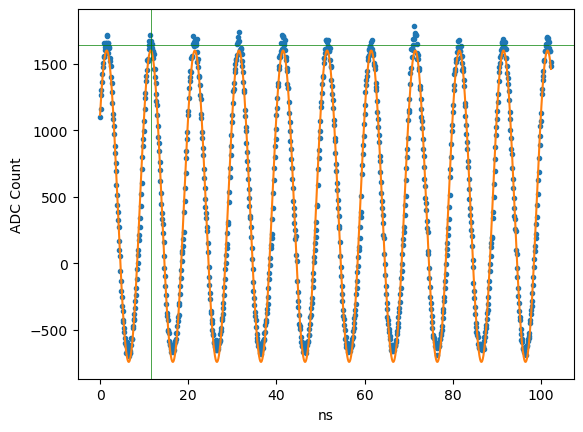

In [25]:
def sinewave(x, A, f, phi, c):
    return A * np.sin(2 * np.pi * f * x + phi) + c

p, _ = curve_fit(sinewave, time_adjusted, adc[4], p0=[3000, 0.1, 0, 0])

A_fit, f_fit, phi_fit, C_fit = p
print(f"Fitted parameters: A={A_fit:.3f}, f={f_fit:.3f}, phi={phi_fit:.3f}, C={C_fit:.3f}")
fitx = np.linspace(time_adjusted[0], time_adjusted[-1], 100000)
plt.plot(time_adjusted, adc[4], '.', label="Data")
plt.plot(fitx, sinewave(fitx, *p), label="Fit")
plt.axvline(time_adjusted[115],color="green", linewidth=0.5)
plt.axhline(adc[4][115],color="green", linewidth=0.5)
plt.xlabel("ns")
plt.ylabel("ADC Count")

Time correction: nan ns


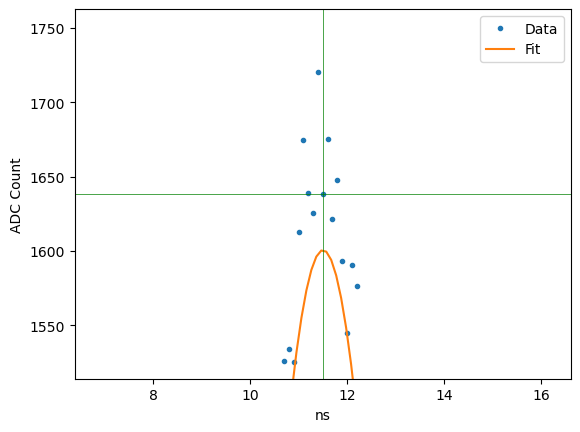

In [26]:
# pt = np.random.randint(0, 1012)
pt = 115
# pt = 964

# Sinewave function
def sinewave(x, A, f, phi, c):
    return A * np.sin(2 * np.pi * f * x + phi) + c

# Fit
p, _ = curve_fit(sinewave, time_adjusted, adc[4], p0=[2500, 0.1, 0, 0])
A_fit, f_fit, phi_fit, C_fit = p

# points for the sine wave
fitx = np.linspace(time_adjusted[0], time_adjusted[-1], 1000)
fity = sinewave(fitx, *p)

x_p = time_adjusted[pt]
y_p = adc[4][pt]

# Period of the sine wave
T = 1 / f_fit
search_range = (x_p - T / 2, x_p + T / 2)

# Bounds on the search range
mask = (fitx >= search_range[0]) & (fitx <= search_range[1])
fitx_in_range = fitx[mask]
fity_in_range = fity[mask]

# Find all the points in the rnge with 'same' y value as y_p (array)
closest_indices = np.where(np.isclose(fity_in_range, y_p, atol=1e-3))[0]
if len(closest_indices) > 0:
    # Find the closest point to x_p
    closest_index = closest_indices[np.argmin(np.abs(fitx_in_range[closest_indices] - x_p))]
    intersection_x = fitx_in_range[closest_index]
else:
    # If there are no points with the same y value, find the closest intersection
    diffs = fity_in_range - y_p
    crossings = np.where(np.diff(np.sign(diffs)))[0]
    if len(crossings) > 0:
        closest_crossing = crossings[np.argmin(np.abs(fitx_in_range[crossings] - x_p))]
        x1, x2 = fitx_in_range[closest_crossing], fitx_in_range[closest_crossing + 1]
        y1, y2 = fity_in_range[closest_crossing], fity_in_range[closest_crossing + 1]
        intersection_x = x1 + (y_p - y1) * (x2 - x1) / (y2 - y1)
    else:
        intersection_x = np.nan

# Time correction
correction = intersection_x - x_p
print(f"Time correction: {correction:.4f} ns")

plt.plot(time_adjusted, adc[4], '.', label="Data")
plt.plot(fitx, fity, label="Fit")
plt.axvline(x_p, color="green", linewidth=0.5)
plt.axhline(y_p, color="green", linewidth=0.5)
if not np.isnan(intersection_x):
    plt.scatter([intersection_x], [y_p], color='red', label="Intersection", zorder=3)
plt.xlabel("ns")
plt.ylabel("ADC Count")
zoom_margin_x = 0.05 * (time_adjusted[-1] - time_adjusted[0])  # 5% of the total x range
zoom_margin_y = 0.05 * (np.max(adc[4]) - np.min(adc[4]))  # 5% of the total y range
plt.xlim(x_p - zoom_margin_x, x_p + zoom_margin_x)
plt.ylim(y_p - zoom_margin_y, y_p + zoom_margin_y)
plt.legend()
plt.show()


In [14]:
# Sinewave function
def sinewave(x, A, f, phi, c):
    return A * np.sin(2 * np.pi * f * x + phi) + c

# Fit
p, _ = curve_fit(sinewave, time_adjusted, adc[4], p0=[2500, 0.1, 0, 0])
A_fit, f_fit, phi_fit, C_fit = p

# Points for the sine wave
fitx = np.linspace(time_adjusted[0], time_adjusted[-1], 1000)
fity = sinewave(fitx, *p)

# Period of the sine wave
T = 1 / f_fit

# Array to store corrections
time_corrections = np.zeros(1024)

# Compute time corrections for all points
for pt in range(1024):
    x_p = time_adjusted[pt]
    y_p = adc[4][pt]

    # Bounds on the search range
    search_range = (x_p - T / 2, x_p + T / 2)
    mask = (fitx >= search_range[0]) & (fitx <= search_range[1])
    fitx_in_range = fitx[mask]
    fity_in_range = fity[mask]

    # Find all the points in the range with 'same' y value as y_p (array)
    closest_indices = np.where(np.isclose(fity_in_range, y_p, atol=1e-3))[0]
    if len(closest_indices) > 0:
        # Find the closest point to x_p
        closest_index = closest_indices[np.argmin(np.abs(fitx_in_range[closest_indices] - x_p))]
        intersection_x = fitx_in_range[closest_index]
    else:
        # If there are no points with the same y value, find the closest intersection
        diffs = fity_in_range - y_p
        crossings = np.where(np.diff(np.sign(diffs)))[0]
        if len(crossings) > 0:
            closest_crossing = crossings[np.argmin(np.abs(fitx_in_range[crossings] - x_p))]
            x1, x2 = fitx_in_range[closest_crossing], fitx_in_range[closest_crossing + 1]
            y1, y2 = fity_in_range[closest_crossing], fity_in_range[closest_crossing + 1]
            intersection_x = x1 + (y_p - y1) * (x2 - x1) / (y2 - y1)
        else:
            intersection_x = np.nan

    # Store time correction
    correction = intersection_x - x_p
    time_corrections[pt] = correction

# Print first 10 corrections to check
print(time_corrections)

[nan nan nan ... nan nan nan]


1024


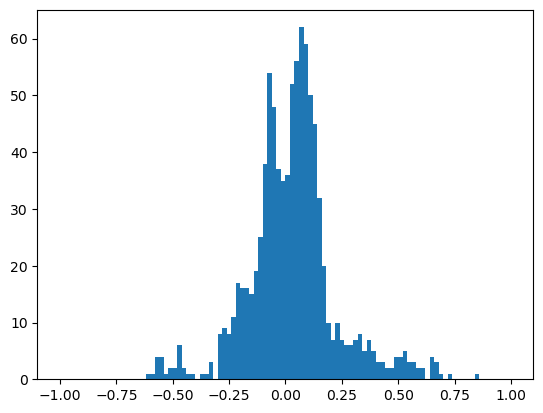

In [15]:
plt.hist(time_corrections, bins=100, range=(-1,1));
print(len(time_corrections))

These ones shoud be the corrections to apply to every 1024 acquisition (actually we should analyse all the events and average for a better correction)

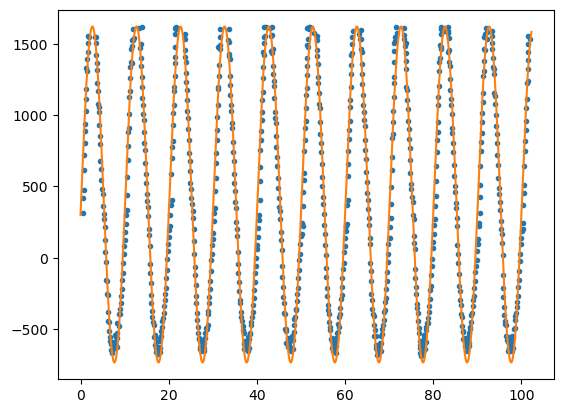

In [16]:
plt.plot(time_adjusted - time_corrections, adc[4], '.', label="Data")
plt.plot(fitx, fity, label="Fit")

In [17]:
def apply_time_corr(ev, corr):
    event=acq[ev]
    corrected_event = corrector.run(event, correct_in_place=True)
    time=corrected_event["time"]
    adc=corrected_event["data"]
    time_adjusted = (time[4] - time[4][0]) * 0.1
    time_adjusted = time_adjusted - corr
    plt.plot(time_adjusted, adc[4], '.', label="Ch. 4")
    return time_adjusted, adc[4]

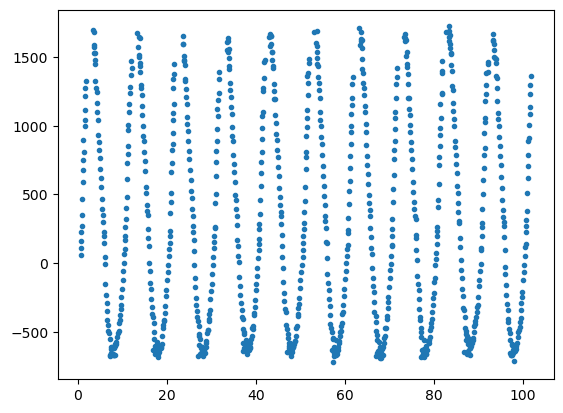

In [18]:
apply_time_corr(698, time_corrections);

## This was only from 1 event, now we try to loop on every event

In [19]:
# Create time_corrections array: shape (len(acq), 128, 8)
time_corrections = np.zeros((len(acq), 128, 8))

# Iterate over all events
for ev in range(len(acq)):
    # Get event data and apply correction
    event = acq[ev]
    corrected_event = corrector.run(event, correct_in_place=True)
    time = corrected_event["time"]
    adc = corrected_event["data"]

    # Adjust time for Channel 4 (assuming you're using Ch. 4 for the fit)
    time_adjusted = (time[4] - time[4][0]) * 0.1

    # Fit the sine wave to Channel 4
    p, _ = curve_fit(sinewave, time_adjusted, adc[4], p0=[2500, 0.1, 0, 0])
    A_fit, f_fit, phi_fit, C_fit = p
    T = 1 / f_fit

    # Generate a finer time axis and fit points
    fitx = np.linspace(time_adjusted[0], time_adjusted[-1], 1000)
    fity = sinewave(fitx, *p)

    # Compute corrections for each point
    for i in range(8):  # Loop over cycles
        for j in range(128):  # Loop over cells in each cycle
            pt = i * 128 + j
            x_p = time_adjusted[pt]
            y_p = adc[4][pt]

            # Bounds on the search range
            search_range = (x_p - T / 2, x_p + T / 2)
            mask = (fitx >= search_range[0]) & (fitx <= search_range[1])
            fitx_in_range = fitx[mask]
            fity_in_range = fity[mask]

            # Find all the points in the range with 'same' y value as y_p (array)
            closest_indices = np.where(np.isclose(fity_in_range, y_p, atol=1e-3))[0]
            if len(closest_indices) > 0:
                # Find the closest point to x_p
                closest_index = closest_indices[np.argmin(np.abs(fitx_in_range[closest_indices] - x_p))]
                intersection_x = fitx_in_range[closest_index]
            else:
                # If no points with the same y value, find the closest intersection
                diffs = fity_in_range - y_p
                crossings = np.where(np.diff(np.sign(diffs)))[0]
                if len(crossings) > 0:
                    closest_crossing = crossings[np.argmin(np.abs(fitx_in_range[crossings] - x_p))]
                    x1, x2 = fitx_in_range[closest_crossing], fitx_in_range[closest_crossing + 1]
                    y1, y2 = fity_in_range[closest_crossing], fity_in_range[closest_crossing + 1]
                    intersection_x = x1 + (y_p - y1) * (x2 - x1) / (y2 - y1)
                else:
                    intersection_x = np.nan

            # Store time correction
            correction = intersection_x - x_p
            time_corrections[ev, j, i] = correction

In [20]:
time_corrections[np.isnan(time_corrections)] = 0
final_time_correction = np.mean(time_corrections, axis=(0, 2))
print(final_time_correction.shape)

(128,)


Test this final averaged correction values on an event using the previous function

In [21]:
def apply_final_time_corr(ev, corr):
    event=acq[ev]
    corrected_event = corrector.run(event, correct_in_place=True)
    time=corrected_event["time"]
    adc=corrected_event["data"]
    time_adjusted = (time[4] - time[4][0]) * 0.1
    for i in range(len(time_adjusted)//128):
        for j in range(128):
            time_adjusted[128*i + j] = time_adjusted[128*i + j] - corr[j]
    plt.plot(time_adjusted, adc[4], '.', label="Ch. 4")
    return time_adjusted, adc[4]

In [22]:
print(time_adjusted.shape)
print(final_time_correction.shape)

(1024,)
(128,)


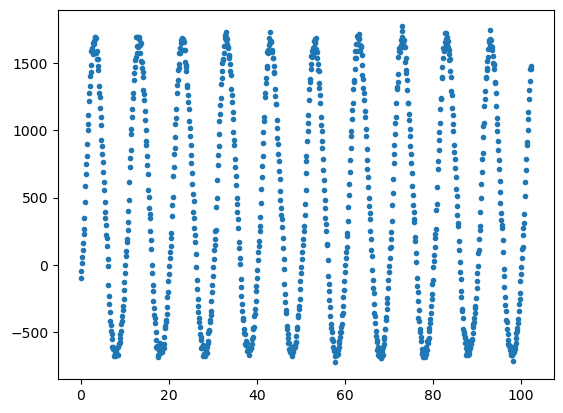

In [23]:
apply_final_time_corr(698, final_time_correction);